In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Understanding the data

In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/menu.csv")

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      259 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  258 non-null    float64
 8   Saturated Fat (% Daily Value)  256 non-null    float64
 9   Trans Fat                      257 non-null    float64
 10  Cholesterol                    254 non-null    float64
 11  Cholesterol (% Daily Value)    259 non-null    float64
 12  Sodium                         258 non-null    flo

In [402]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25.0,0.0,260.0,87.0,750.0,31.0,31.0,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15.0,0.0,25.0,8.0,770.0,32.0,30.0,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42.0,0.0,45.0,15.0,780.0,NaN,29.0,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52.0,0.0,285.0,95.0,860.0,36.0,30.0,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42.0,0.0,50.0,16.0,880.0,37.0,30.0,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0


In [403]:
print(df.isnull().any())

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                         True
Total Fat (% Daily Value)        False
Saturated Fat                     True
Saturated Fat (% Daily Value)     True
Trans Fat                         True
Cholesterol                       True
Cholesterol (% Daily Value)       True
Sodium                            True
Sodium (% Daily Value)            True
Carbohydrates                     True
Carbohydrates (% Daily Value)     True
Dietary Fiber                    False
Dietary Fiber (% Daily Value)     True
Sugars                            True
Protein                           True
Vitamin A (% Daily Value)         True
Vitamin C (% Daily Value)         True
Calcium (% Daily Value)           True
Iron (% Daily Value)              True
dtype: bool


In [404]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,259.000000,260.000000,258.000000,256.000000,257.000000,254.000000,259.000000,258.000000,257.000000,259.000000,256.000000,260.000000,259.000000,259.000000,259.000000,258.000000,259.000000,257.000000,258.000000
mean,368.269231,127.096154,14.034749,21.815385,5.961240,29.675781,0.204280,54.980315,18.370656,497.344961,20.747082,47.297297,15.730469,1.630769,6.544402,29.162162,13.343629,13.406977,8.559846,20.809339,7.786822
std,240.269886,127.875914,14.076162,21.885199,5.313192,26.369775,0.430866,87.239729,29.145879,578.979904,24.120835,28.295924,9.375480,1.567717,6.315429,28.424467,11.447964,24.428747,26.393403,17.010987,8.736362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.250000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,102.500000,5.000000,30.000000,10.000000,0.000000,0.000000,5.500000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.000000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.000000,35.000000,9.750000,48.000000,0.000000,65.000000,21.000000,875.000000,37.000000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [405]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        1
Total Fat (% Daily Value)        0
Saturated Fat                    2
Saturated Fat (% Daily Value)    4
Trans Fat                        3
Cholesterol                      6
Cholesterol (% Daily Value)      1
Sodium                           2
Sodium (% Daily Value)           3
Carbohydrates                    1
Carbohydrates (% Daily Value)    4
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    1
Sugars                           1
Protein                          1
Vitamin A (% Daily Value)        2
Vitamin C (% Daily Value)        1
Calcium (% Daily Value)          3
Iron (% Daily Value)             2
dtype: int64

#Cleaning the data(dealing with missing values and removing unnnecessary columns)

In [0]:
df=df[["Category","Item","Calories","Total Fat (% Daily Value)","Saturated Fat (% Daily Value)","Cholesterol (% Daily Value)","Sodium (% Daily Value)","Carbohydrates (% Daily Value)","Dietary Fiber (% Daily Value)","Vitamin A (% Daily Value)","Vitamin C (% Daily Value)","Calcium (% Daily Value)","Iron (% Daily Value)","Protein","Sugars","Trans Fat"]]

In [0]:
df.rename(columns = {"Total Fat (% Daily Value)":"Total Fat","Saturated Fat (% Daily Value)":"Saturated Fat","Cholesterol (% Daily Value)":"Cholesterol","Sodium (% Daily Value)":"Sodium","Carbohydrates (% Daily Value)":"Carbohydrates","Dietary Fiber (% Daily Value)":"Dietary Fiber","Vitamin A (% Daily Value)":"Vitamin A","Vitamin C (% Daily Value)":"Vitamin C","Calcium (% Daily Value)":"Calcium","Iron (% Daily Value)":"Iron"},inplace=True)

In [408]:
df.iloc[57:61]

,Category,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Iron,Protein,Sugars,Trans Fat
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,510,33,18.0,16.0,41.0,18.0,13.0,4.0,6.0,15.0,20.0,24.0,10.0,0.0
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,350,13,9.0,22.0,34.0,14.0,13.0,4.0,8.0,15.0,20.0,28.0,8.0,0.0
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,670,51,44.0,29.0,59.0,19.0,14.0,8.0,20.0,30.0,20.0,36.0,11.0,0.0
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,510,31,36.0,35.0,52.0,15.0,13.0,8.0,20.0,30.0,20.0,40.0,9.0,0.0


In [0]:
df["Category"] = df["Category"].str.replace("Smoothies & Shakes","Smoothies")

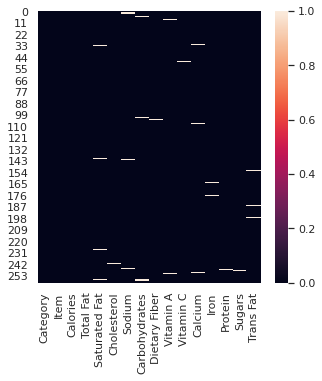

In [410]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(df.isnull())
plt.show()

In [411]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [412]:
df.head(5)

,Category,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Iron,Protein,Sugars,Trans Fat
0,Breakfast,Egg McMuffin,300,20,25.0,87.0,31.0,10.0,17.0,10.0,0.0,25.0,15.0,17.0,3.0,0.0
1,Breakfast,Egg White Delight,250,12,15.0,8.0,32.0,10.0,17.0,6.0,0.0,25.0,8.0,18.0,3.0,0.0
2,Breakfast,Sausage McMuffin,370,35,42.0,15.0,NaN,10.0,17.0,8.0,0.0,25.0,10.0,14.0,2.0,0.0
3,Breakfast,Sausage McMuffin with Egg,450,43,52.0,95.0,36.0,10.0,17.0,15.0,0.0,30.0,15.0,21.0,2.0,0.0
4,Breakfast,Sausage McMuffin with Egg Whites,400,35,42.0,16.0,37.0,10.0,17.0,6.0,0.0,25.0,10.0,21.0,2.0,0.0


In [0]:
df = df.interpolate(method ='linear', limit_direction ='forward') 

In [414]:
print(df.isnull().any())

Category         False
Item             False
Calories         False
Total Fat        False
Saturated Fat    False
Cholesterol      False
Sodium           False
Carbohydrates    False
Dietary Fiber    False
Vitamin A        False
Vitamin C        False
Calcium          False
Iron             False
Protein          False
Sugars           False
Trans Fat        False
dtype: bool


In [0]:
df = df.sort_values(by="Category")

# Comparing Categories

In [416]:
df.pivot_table('Protein', 'Category')

,Protein
Category,
Beef & Pork,27.333333
Beverages,1.333333
Breakfast,19.857143
Chicken & Fish,29.111111
Coffee & Tea,8.863158
Desserts,4.000000
Salads,19.833333
Smoothies,11.017857
Snacks & Sides,8.384615


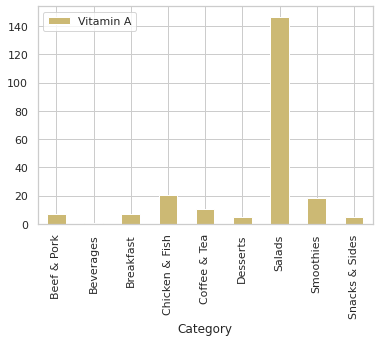

In [417]:
df.pivot_table('Vitamin A', 'Category').plot(kind='bar', stacked=True, color = 'y')

[Text(0, 0, 'Beef & Pork'),
 Text(0, 0, 'Beverages'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Chicken & Fish'),
 Text(0, 0, 'Coffee & Tea'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Salads'),
 Text(0, 0, 'Smoothies'),
 Text(0, 0, 'Snacks & Sides')]

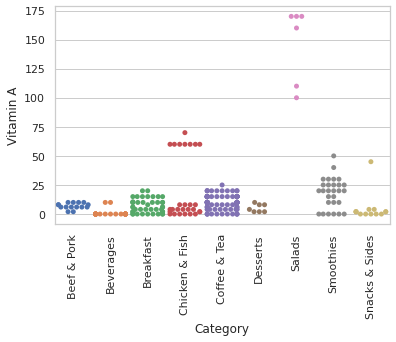

In [418]:
sns.set(style="whitegrid", color_codes=True)
ax= sns.swarmplot(x="Category", y="Vitamin A", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

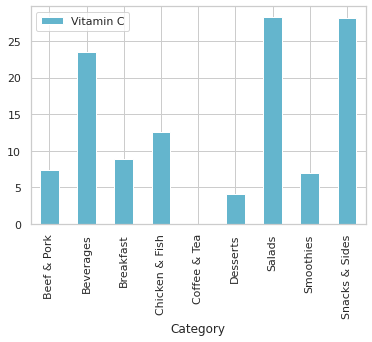

In [419]:
df.pivot_table('Vitamin C', 'Category').plot(kind='bar', stacked=True, color = 'c')

[Text(0, 0, 'Beef & Pork'),
 Text(0, 0, 'Beverages'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Chicken & Fish'),
 Text(0, 0, 'Coffee & Tea'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Salads'),
 Text(0, 0, 'Smoothies'),
 Text(0, 0, 'Snacks & Sides')]

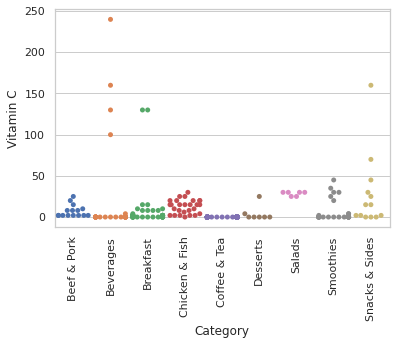

In [420]:
sns.set(style="whitegrid", color_codes=True)
ax1= sns.swarmplot(x="Category", y="Vitamin C", data=df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

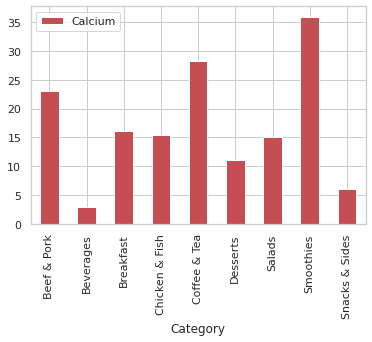

In [421]:
df.pivot_table('Calcium', 'Category').plot(kind='bar', stacked=True, color = 'r')

[Text(0, 0, 'Beef & Pork'),
 Text(0, 0, 'Beverages'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Chicken & Fish'),
 Text(0, 0, 'Coffee & Tea'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Salads'),
 Text(0, 0, 'Smoothies'),
 Text(0, 0, 'Snacks & Sides')]

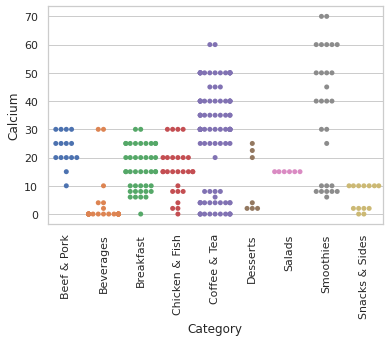

In [422]:
sns.set(style="whitegrid", color_codes=True)
ax1= sns.swarmplot(x="Category", y="Calcium", data=df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

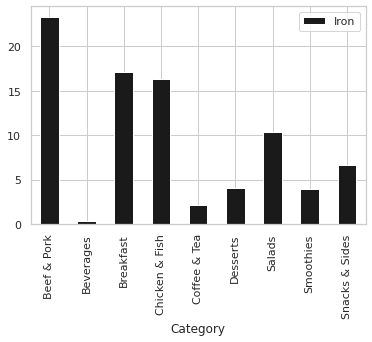

In [423]:
df.pivot_table('Iron', 'Category').plot(kind='bar',color = 'k')

[Text(0, 0, 'Beef & Pork'),
 Text(0, 0, 'Beverages'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Chicken & Fish'),
 Text(0, 0, 'Coffee & Tea'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Salads'),
 Text(0, 0, 'Smoothies'),
 Text(0, 0, 'Snacks & Sides')]

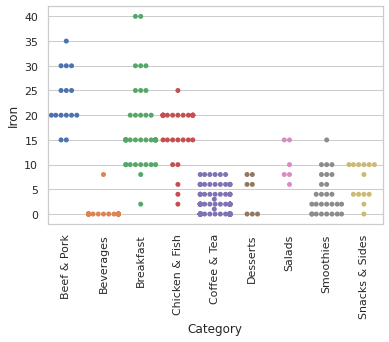

In [424]:
sns.set(style="whitegrid", color_codes=True)
ax1= sns.swarmplot(x="Category", y="Iron", data=df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

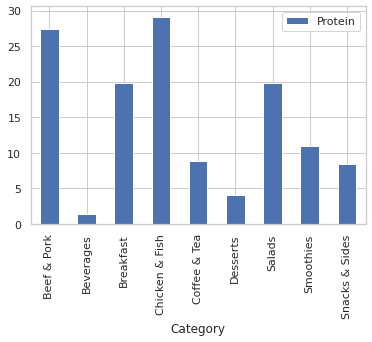

In [425]:
df.pivot_table('Protein', 'Category').plot(kind='bar', stacked=True, color = 'b')

[Text(0, 0, 'Beef & Pork'),
 Text(0, 0, 'Beverages'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Chicken & Fish'),
 Text(0, 0, 'Coffee & Tea'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Salads'),
 Text(0, 0, 'Smoothies'),
 Text(0, 0, 'Snacks & Sides')]

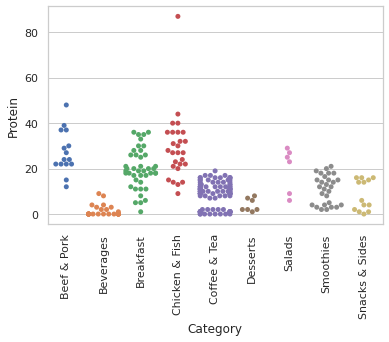

In [426]:
sns.set(style="whitegrid", color_codes=True)
ax1= sns.swarmplot(x="Category", y="Protein", data=df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

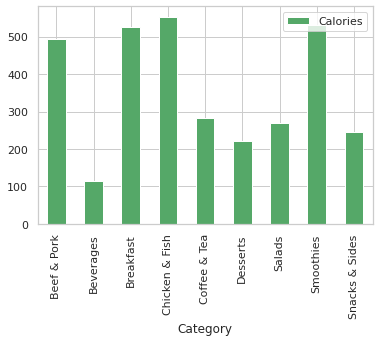

In [427]:
df.pivot_table( 'Calories', 'Category').plot( kind='bar', stacked=True, color = "g")

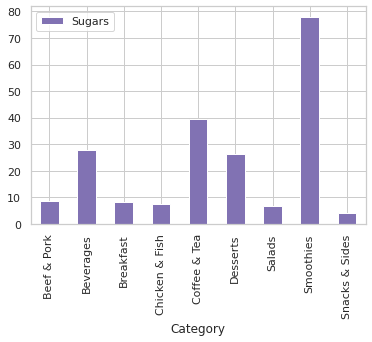

In [428]:
df.pivot_table( 'Sugars', 'Category').plot( kind='bar', stacked=True, color = "m")

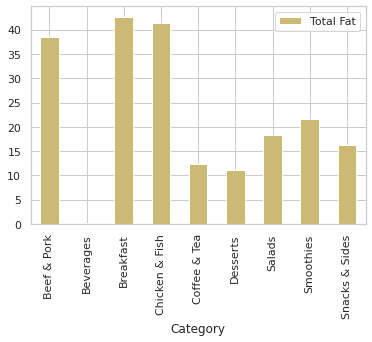

In [429]:
df.pivot_table( 'Total Fat', 'Category').plot( kind='bar', stacked=True, color = "y")

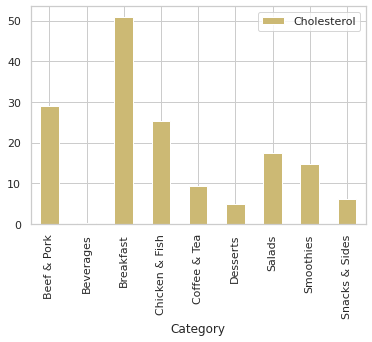

In [430]:
df.pivot_table( 'Cholesterol', 'Category').plot( kind='bar', stacked=True, color = "y")

               Calories  Total Fat  ...    Sugars  Trans Fat
Calories       1.000000   0.904123  ...  0.259752   0.521865
Total Fat      0.904123   1.000000  ... -0.115630   0.432975
Saturated Fat  0.846093   0.847867  ...  0.192937   0.607230
Cholesterol    0.595280   0.680391  ... -0.136234   0.251956
Sodium         0.712783   0.847125  ... -0.425647   0.188830
Carbohydrates  0.775164   0.455684  ...  0.753138   0.452896
Dietary Fiber  0.537000   0.573567  ... -0.288831   0.057180
Vitamin A      0.106221   0.053772  ...  0.042643   0.072256
Vitamin C     -0.068747  -0.089353  ... -0.069879  -0.075952
Calcium        0.425854   0.158706  ...  0.602986   0.385320
Iron           0.643247   0.735081  ... -0.365108   0.326521
Protein        0.788966   0.808046  ... -0.177282   0.390854
Sugars         0.259752  -0.115630  ...  1.000000   0.332872
Trans Fat      0.521865   0.432975  ...  0.332872   1.000000

[14 rows x 14 columns]


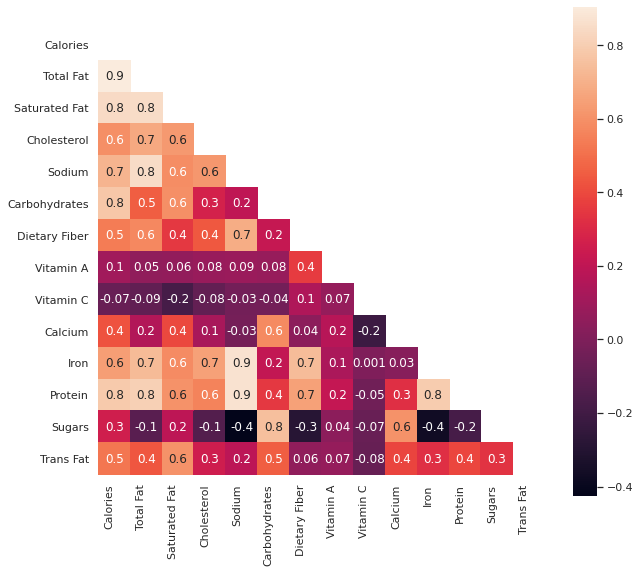

In [431]:
correlation_matrix = df.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
print(correlation_matrix)
size_scale = 500
f, ax = plt.subplots(figsize=(10, 9))
ax = sns.heatmap(
    correlation_matrix,
    square=True,
    annot = True,
    mask=mask,
    fmt = ".1"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

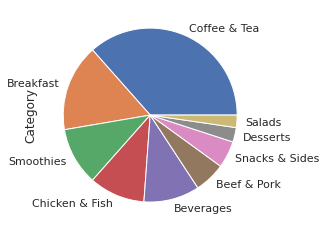

In [432]:
df.Category.value_counts().plot.pie()

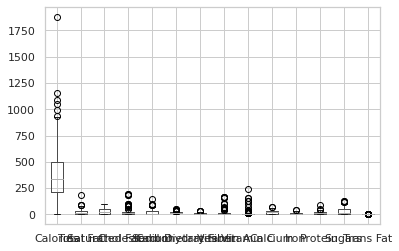

In [433]:
df.boxplot()

In [0]:
df['isGrilled']=df.Item.str.contains("Grilled")
df['isCrispy']= df.Item.str.contains("Crispy")


In [435]:
df[df["isCrispy"] == True]

,Category,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Iron,Protein,Sugars,Trans Fat,isGrilled,isCrispy
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,670,51,44.0,29.0,59.0,19.0,14.0,8.0,20.0,30.0,20.0,36.0,11.0,0.0,False,True
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,510,33,18.0,16.0,41.0,18.0,13.0,4.0,6.0,15.0,20.0,24.0,10.0,0.0,False,True
61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,610,43,31.0,24.0,58.0,19.0,13.0,4.0,20.0,15.0,20.0,32.0,11.0,0.0,False,True
70,Chicken & Fish,Premium McWrap Chicken & Bacon (Crispy Chicken),630,49,45.0,26.0,64.0,19.0,13.0,60.0,20.0,20.0,20.0,32.0,7.0,0.5,False,True
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,750,59,51.0,31.0,72.0,22.0,15.0,8.0,25.0,30.0,15.0,36.0,16.0,0.5,False,True
72,Chicken & Fish,Premium McWrap Chicken & Ranch (Crispy Chicken),610,47,40.0,21.0,56.0,19.0,14.0,60.0,15.0,20.0,20.0,27.0,8.0,0.5,False,True
74,Chicken & Fish,Premium McWrap Southwest Chicken (Crispy Chicken),670,51,40.0,21.0,62.0,23.0,19.0,60.0,15.0,20.0,20.0,27.0,12.0,0.5,False,True
76,Chicken & Fish,Premium McWrap Chicken Sweet Chili (Crispy Chi...,540,35,23.0,16.0,52.0,20.0,13.0,60.0,15.0,8.0,20.0,23.0,14.0,0.0,False,True
65,Chicken & Fish,Southern Style Crispy Chicken Sandwich,430,29,15.0,14.0,38.0,14.0,7.0,4.0,2.0,15.0,15.0,21.0,7.0,0.0,False,True
85,Salads,Premium Bacon Ranch Salad with Crispy Chicken,380,33,29.0,23.0,36.0,7.0,10.0,100.0,25.0,15.0,8.0,25.0,5.0,0.0,False,True


In [0]:
grilled_df = df[df['isGrilled'] == True]
crispy_df = df[df['isCrispy'] == True]
grilled_df=grilled_df[['Item','Total Fat','Calories']]
crispy_df=crispy_df[['Item','Total Fat','Calories']]

In [0]:
df1=grilled_df.reset_index(drop=True).merge(crispy_df.reset_index(drop=True),left_index=True,right_index=True)

In [0]:
df1.columns=['Items-Grilled','TotalFat-Grilled','Calories-Grilled','Items-Crispy','TotalFat-Crispy','Calories-Crispy']
df1=df1.drop('Items-Crispy',axis=1)

In [439]:
df1.shape

(13, 5)

In [440]:
df1.head()

,Items-Grilled,TotalFat-Grilled,Calories-Grilled,TotalFat-Crispy,Calories-Crispy
0,Premium Grilled Chicken Club Sandwich,31,510,51,670
1,Premium McWrap Chicken & Bacon (Grilled Chicken),28,480,33,510
2,Premium Grilled Chicken Classic Sandwich,13,350,43,610
3,Premium McWrap Chicken Sweet Chili (Grilled Ch...,15,380,49,630
4,Premium McWrap Chicken & Ranch (Grilled Chicken),27,450,59,750


In [0]:
df1['Item']=df1['Items-Grilled'].str.replace("Grilled","")

In [0]:
df1=df1.drop('Items-Grilled',axis=1)

In [443]:
df1.head()

,TotalFat-Grilled,Calories-Grilled,TotalFat-Crispy,Calories-Crispy,Item
0,31,510,51,670,Premium Chicken Club Sandwich
1,28,480,33,510,Premium McWrap Chicken & Bacon ( Chicken)
2,13,350,43,610,Premium Chicken Classic Sandwich
3,15,380,49,630,Premium McWrap Chicken Sweet Chili ( Chicken)
4,27,450,59,750,Premium McWrap Chicken & Ranch ( Chicken)


In [0]:
df1.index=df1.Item

In [445]:
df1.head()

,TotalFat-Grilled,Calories-Grilled,TotalFat-Crispy,Calories-Crispy,Item
Item,,,,,
Premium Chicken Club Sandwich,31,510,51,670,Premium Chicken Club Sandwich
Premium McWrap Chicken & Bacon ( Chicken),28,480,33,510,Premium McWrap Chicken & Bacon ( Chicken)
Premium Chicken Classic Sandwich,13,350,43,610,Premium Chicken Classic Sandwich
Premium McWrap Chicken Sweet Chili ( Chicken),15,380,49,630,Premium McWrap Chicken Sweet Chili ( Chicken)
Premium McWrap Chicken & Ranch ( Chicken),27,450,59,750,Premium McWrap Chicken & Ranch ( Chicken)


In [0]:
df1.drop(columns="Item",inplace=True)

In [451]:
df1["TotalFat-Crispy"].replace({43:33},inplace=True)
df1.iloc[[2,0]]

,TotalFat-Grilled,Calories-Grilled,TotalFat-Crispy,Calories-Crispy
Item,,,,
Premium Chicken Classic Sandwich,13,350,33,610
Premium Chicken Club Sandwich,31,510,51,670


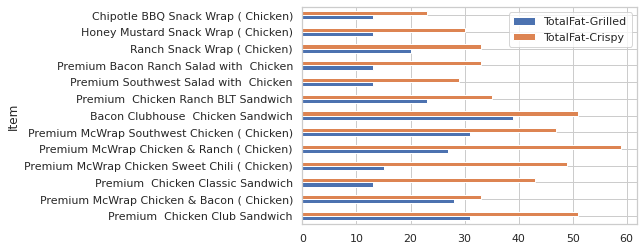

In [448]:
df1[["TotalFat-Grilled","TotalFat-Crispy"]].plot(kind="barh")

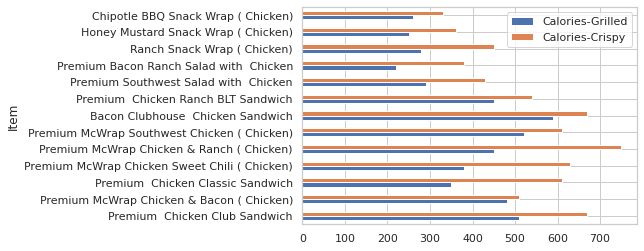

In [449]:
df1[["Calories-Grilled","Calories-Crispy"]].plot(kind="barh")

In [450]:
df["Category"].value_counts()

Coffee & Tea      95
Breakfast         42
Smoothies         28
Chicken & Fish    27
Beverages         27
Beef & Pork       15
Snacks & Sides    13
Desserts           7
Salads             6
Name: Category, dtype: int64